<a href="https://colab.research.google.com/github/AsmaaIbrahiim/Face-Mask-Detection/blob/model_expriment/For_Testing_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import tensorflow as tf
import os 
from tensorflow import keras
from keras.applications.vgg16 import preprocess_input
import random 
from glob import glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator ,array_to_img, img_to_array, load_img
import cv2

## Importing Trained Model

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

#https://drive.google.com/file/d/1rFqZqG61yvi0axntXCP1ZkSS6XGzynQY/view
file_id_1 = '1rFqZqG61yvi0axntXCP1ZkSS6XGzynQY'
downloaded = drive.CreateFile({'id': file_id_1})
downloaded.GetContentFile('effici_net.h5')

In [3]:
effici_net_model = keras.models.load_model('/content/effici_net.h5')

## Importing Dataset to test on 

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [7]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 93% 152M/163M [00:01<00:00, 110MB/s] 
100% 163M/163M [00:01<00:00, 113MB/s]


In [8]:
!unzip -qq \*.zip  && rm *.zip

In [9]:
TEST_DIR = os.path.join("/content", "data")
all_data = [y for x in os.walk(TEST_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
print(len(all_data))
all_data[:10]
classes = ['masked','non_masked']

7553


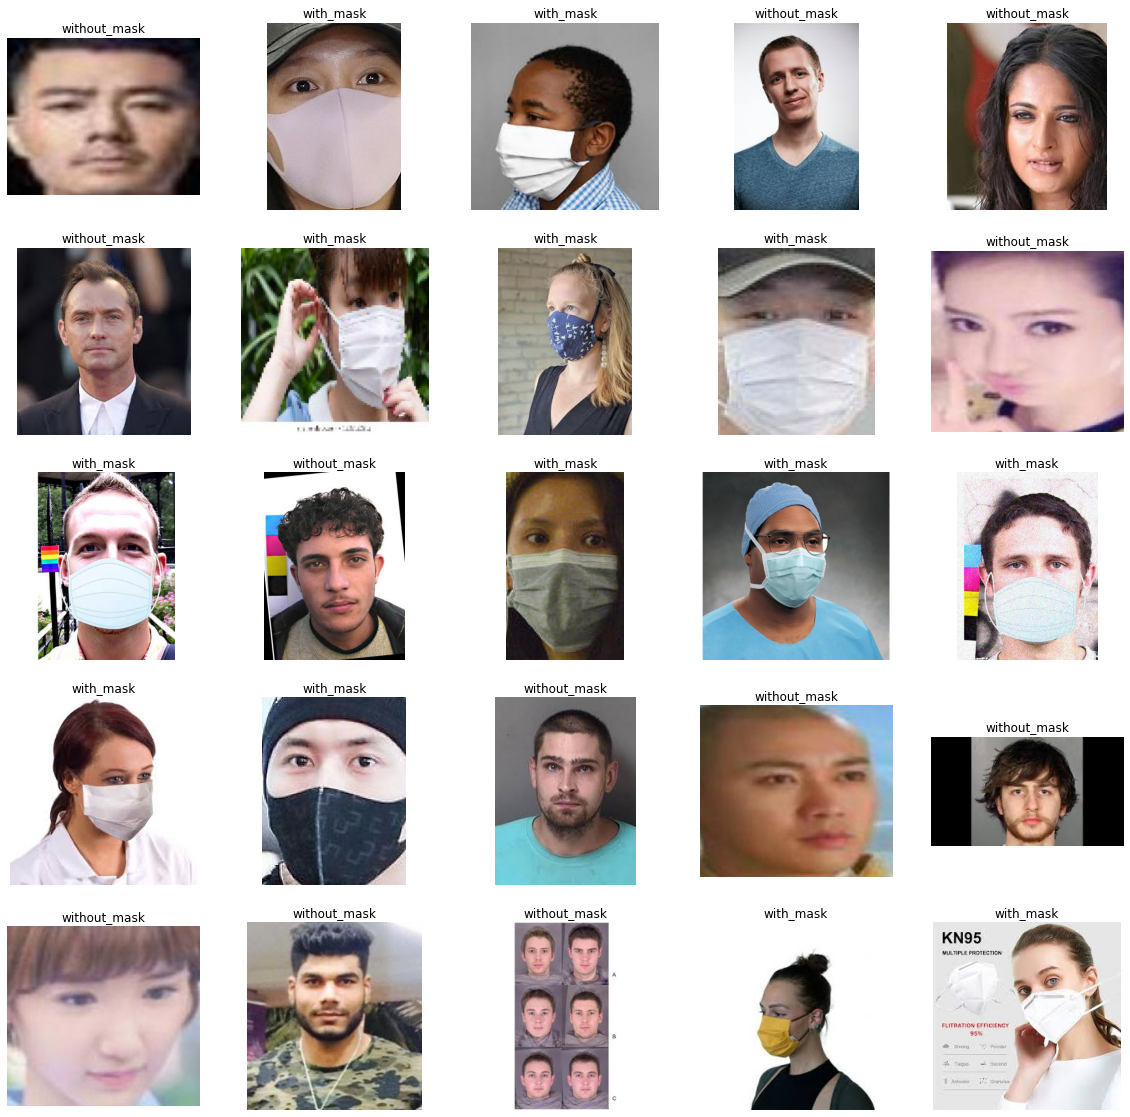

In [10]:
# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(20,20))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

In [11]:
BATCH_SIZE = 500
HEIGHT = 128
WIDTH = 128
test_datagen =  ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(HEIGHT, WIDTH),
                                                  batch_size=BATCH_SIZE,
                                                  shuffle = False,
                                                  color_mode='rgb')

Found 7553 images belonging to 2 classes.


## Testing The Model

In [12]:
effici_net_model.evaluate(test_generator, batch_size=500, steps=20)

 4/20 [=====>........................] - ETA: 10s - loss: 0.0339 - accuracy: 0.9850

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 51s 934ms/step - loss: 0.2958 - accuracy: 0.9408


[0.2957879900932312, 0.940818190574646]

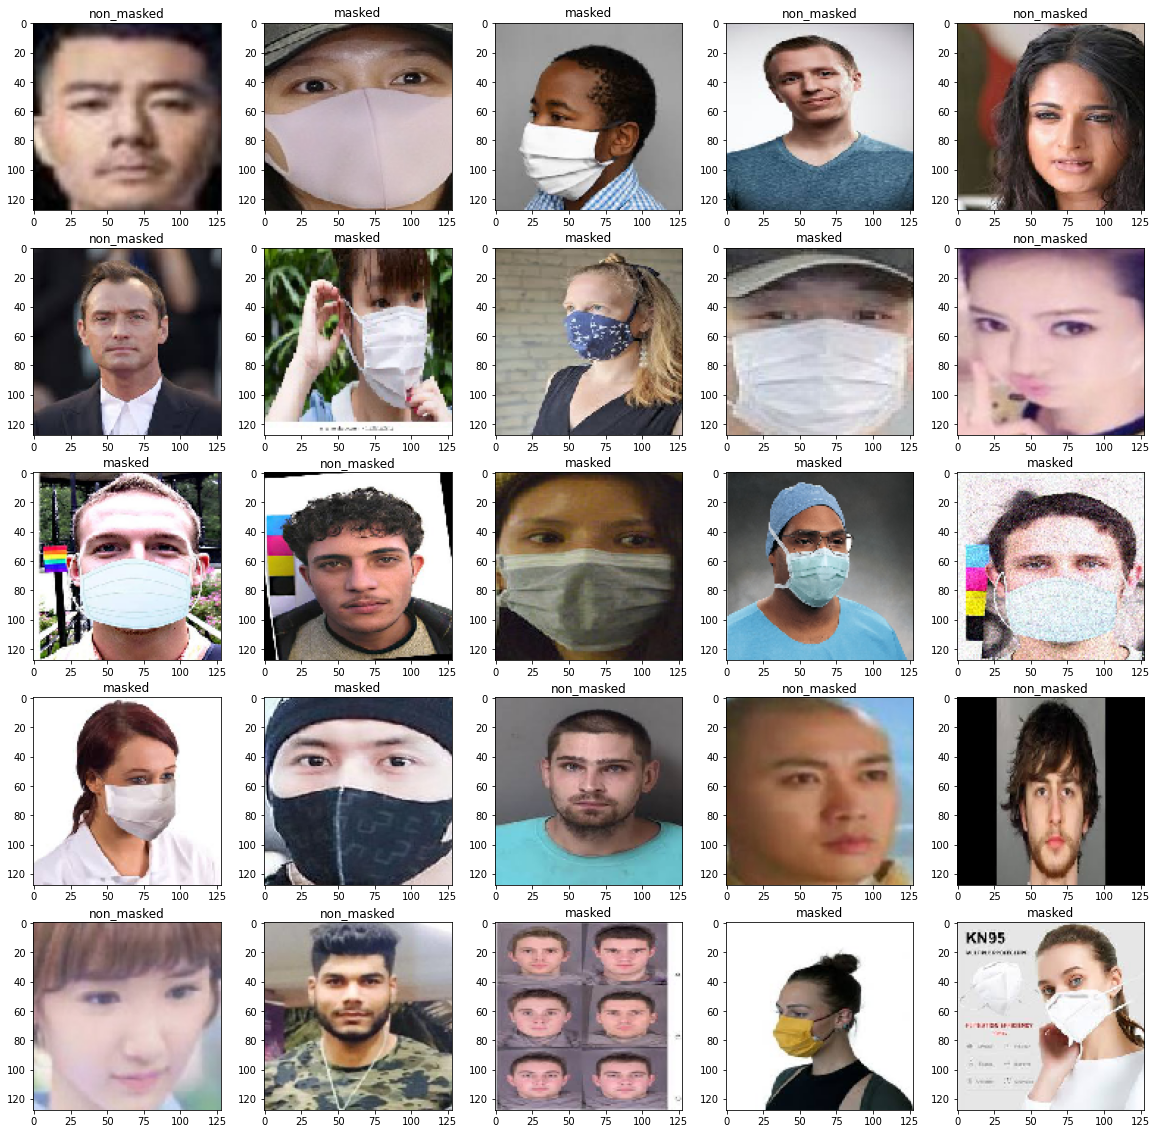

In [13]:
plt.figure(figsize=(20,20))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = load_img(images[i],target_size = (HEIGHT,WIDTH)) # Read image from disk
    #plt.imshow(image)
    #plt.title(classes[int(np.argmax(vgg16_model.predict(np.expand_dims(image,axis=0))))])
    #plt.axis('off')
    plt.imshow(image)

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = tf.keras.applications.vgg16.preprocess_input(image)
    plt.title(classes[np.argmax(effici_net_model.predict(image))])
plt.show()